使用传统算法，提取待标注区域

In [1]:
import glob
import cv2
import os.path as ops
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

## 思路探索

In [2]:
#查看图片
def show_images(images,closize=2,set_locator=False,titles=[]):
    """[展示一组照片]

    Args:
        images ([list(2D or 3D ndarray)]): [图片列表]
        closize (int, optional): [每行的图片个数]. Defaults to 2.
        set_locator (bool, optional): [是否设置刻度线]. Defaults to False.
        titles (list, optional): [图片标题]. Defaults to [].
    """    
    rows=int(len(images)/closize)+1
    fig=plt.figure(figsize=(34,14))
    
    xmajorLocator = MultipleLocator(100)  # 将x主刻度标签设置为50的倍数
    xminorLocator = MultipleLocator(50) #将x轴次刻度标签设置为5的倍数
    
    ymajorLocator = MultipleLocator(100)
    yminorLocator = MultipleLocator(50) #将x轴次刻度标签设置为5的倍数
    
    for find,image in enumerate(images):
        if not np.any(image>1):
            image=image*255
        ax=fig.add_subplot(rows,closize,find+1)
        ax.imshow(image)
        
        if len(titles)==0:
            plt.title('{}-({})'.format(find,image.shape)) #图片大小作为标题
        else:
            plt.title('{}-({})'.format(titles[find],image.shape)) #自定义标题
        
        if set_locator:
            #主刻度
            ax.xaxis.set_major_locator(xmajorLocator)
            ax.yaxis.set_major_locator(ymajorLocator)
            
            #次刻度
            ax.xaxis.set_minor_locator(xminorLocator)
            ax.yaxis.set_minor_locator(yminorLocator)
            
            ax.xaxis.grid(True, which='major',linestyle='-.') #x坐标轴的网格使用主刻度
            ax.yaxis.grid(True, which='major',linestyle='-.') #x坐标轴的网格使用主刻度
    plt.show()

In [4]:
images_path='/EHOLLY_DATA/飞拍/roi/'
clanames=['脱碳脏污']

files_path=glob.glob(ops.join(images_path,clanames[0],'*.bmp'))
print(files_path)

['/EHOLLY_DATA/飞拍/roi/脱碳脏污/2021.01.03 20.07.15.897-201216211315773.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2021.02.01 04.54.37.415-210110210635103.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2020.12.24 10.34.09.234-201130153140512.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2021.01.01 00.59.31.743-201204172009676.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2020.12.22 05.51.43.959-201130090635510.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2021.01.01 10.01.56.413-201205093855106.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2020.12.16 12.33.05.380-201128022951487.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2020.12.28 09.53.18.872-201128205541677.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2020.12.23 13.56.33.064-201129183451776.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2020.12.26 12.34.42.954-201130233028102.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2020.12.21 09.53.31.822-201128091702676.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2020.12.22 04.17.30.519-201126003045670.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2020.12.23 21.23.48.335-201128161420519.bmp', '/EHOLLY_DATA/飞拍/roi/脱碳脏污/2021.01.01 08.22.13.760-2012051714036

(697, 2448, 3)


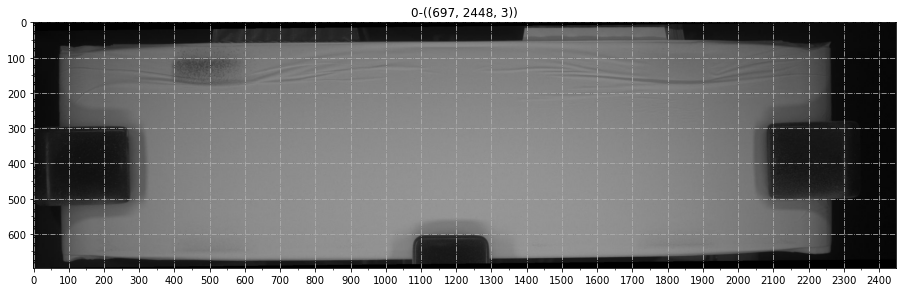

In [24]:
#展示图片
getind=0
file_path=files_path[getind]
# file_path=ops.join('images/pit/2020.10.07_08.53.27.101-200908181918514.jpg')
image=cv2.imread(file_path)
print(image.shape)
show_images([image[...,::-1]],set_locator=True)
# getind+=1

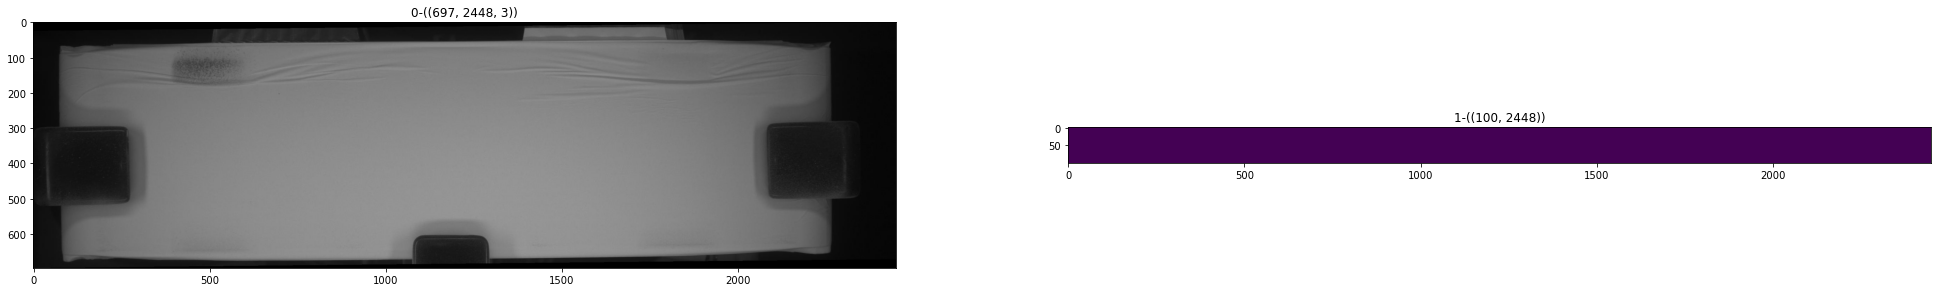

In [7]:
#使用hsv进行分析
roi_hsv=cv2.cvtColor(image[142:150,877:886,::-1],cv2.COLOR_BGR2HSV)
target_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[100:200,:,:]

roi_hist = cv2.calcHist([roi_hsv], [0, 1], None, [12, 12], [0, 180, 0, 256])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
dst=cv2.calcBackProject([target_hsv],[0,1],roi_hist,[0,180,0,256],1)
show_images([image[...,::-1],dst])

In [8]:
# 展示图像水平方向的像素值
def show_horizontal_pxile(img,choicey):
    """[展示图像某一位置水平方向的像素值]

    Args:
        img ([3D or 2D ndarray]): [待展示图像]
        choicey ([int]): [水平位置]
    """
    fig=plt.figure(figsize=(24,4))
    xmajorLocator = MultipleLocator(100)  # 将x主刻度标签设置为50的倍数
    xminorLocator = MultipleLocator(50) #将x轴次刻度标签设置为5的倍数
    
    ymajorLocator = MultipleLocator(20)
    yminorLocator = MultipleLocator(5) #将x轴次刻度标签设置为5的倍数
    ax=fig.add_subplot(121)
    
    colors=['b','g','r']
    if len(img.shape)==3:
        for i in range(3):
            ax.plot(img[choicey,:,i],color=colors[i])
    else:
        ax.plot(img[choicey,:],color='y')
    #主刻度
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.yaxis.set_major_locator(ymajorLocator)
            
    #次刻度
    ax.xaxis.set_minor_locator(xminorLocator)
    ax.yaxis.set_minor_locator(yminorLocator)
            
    ax.xaxis.grid(True, which='major',linestyle='-.') #x坐标轴的网格使用主刻度
    ax.yaxis.grid(True, which='major',linestyle='-.') #x坐标轴的网格使用主刻度
    
    ax1=fig.add_subplot(122)
    
    if len(img.shape)==3:
        img[choicey,:,2]=255
    else:
        img[choicey,:]=255
    ax1.imshow(img[...,::-1])
    plt.show()    

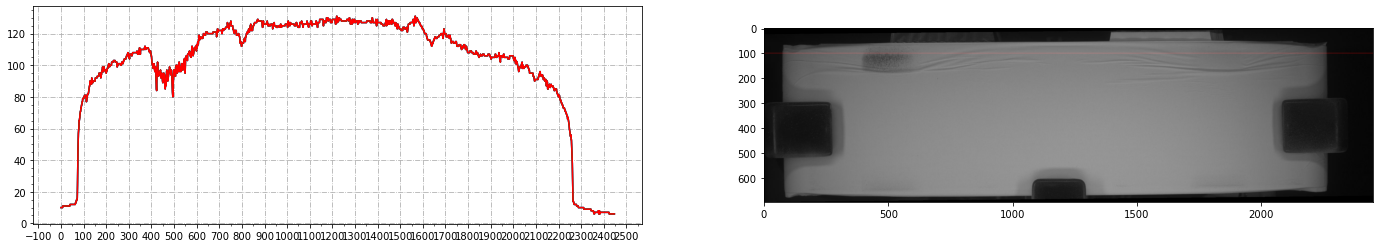

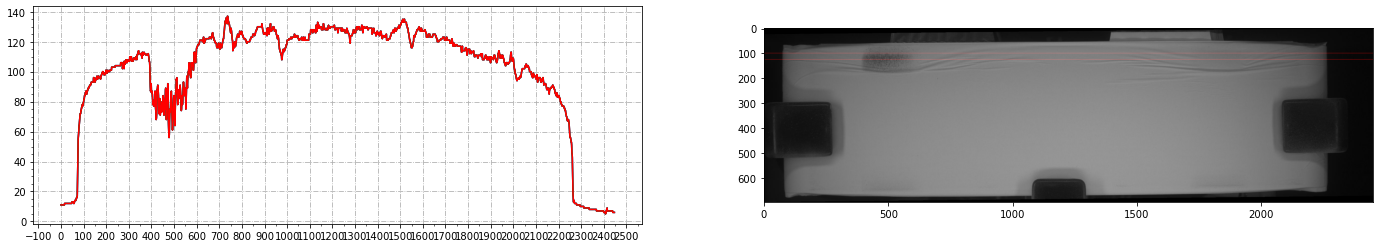

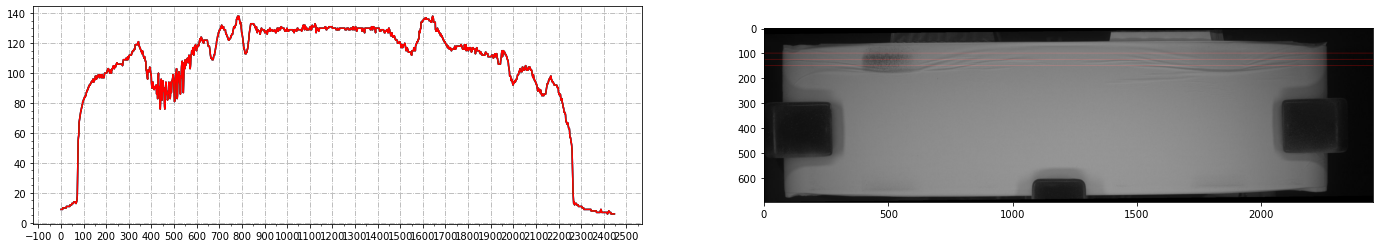

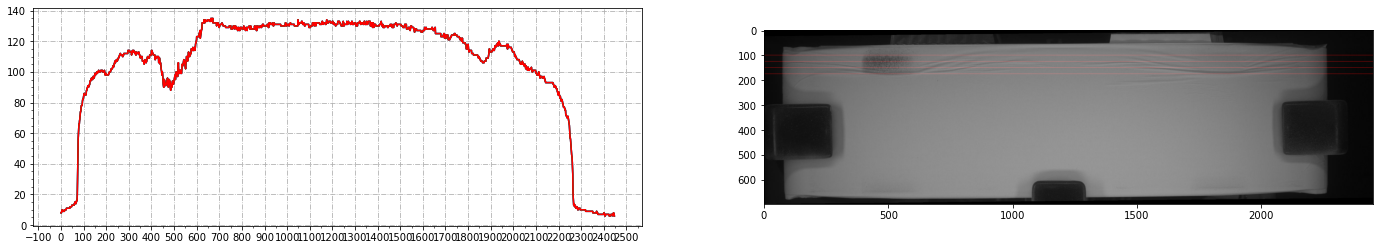

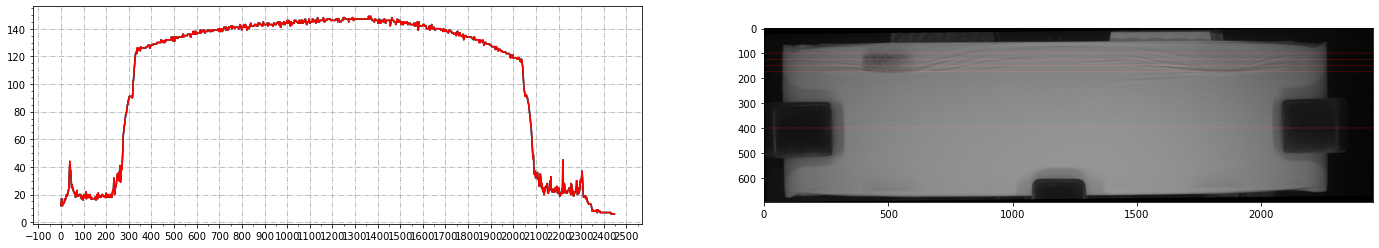

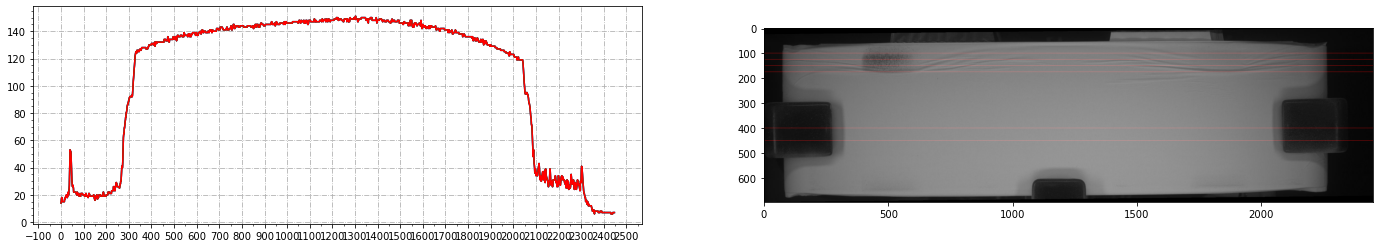

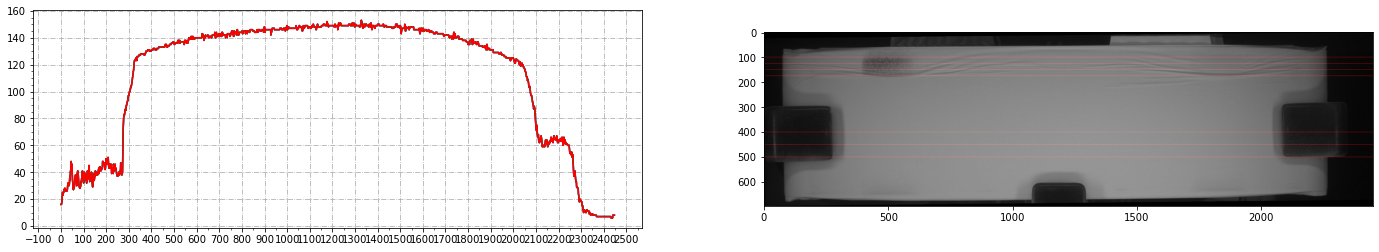

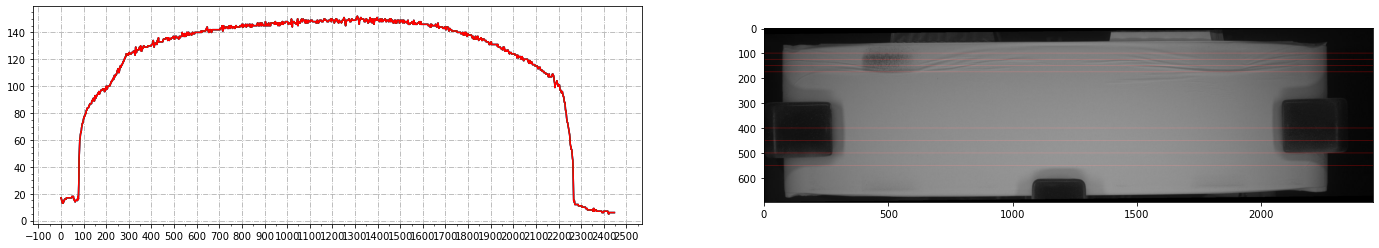

In [12]:
#查看感兴趣区域的像素值
choicey_list=list(range(100,200,25))
choicey_list.extend(list(range(400,600,50)))
img_tmp=image.copy()

for choicey in choicey_list:
    show_horizontal_pxile(img_tmp,choicey)

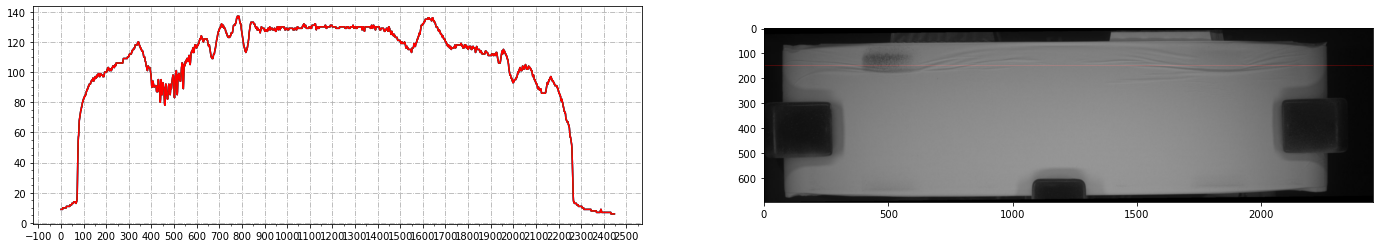

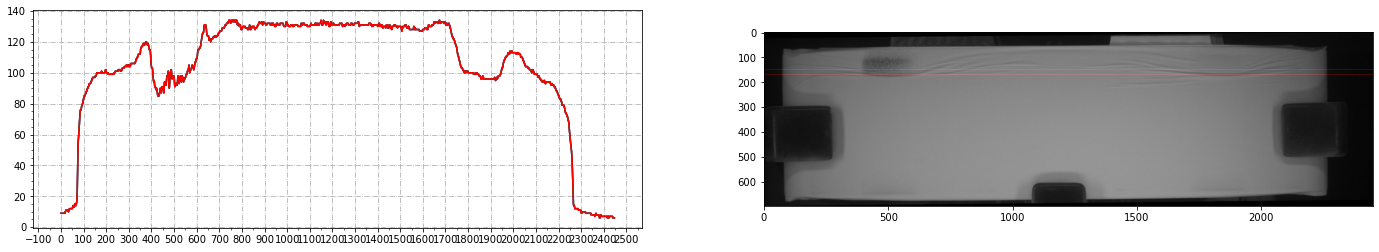

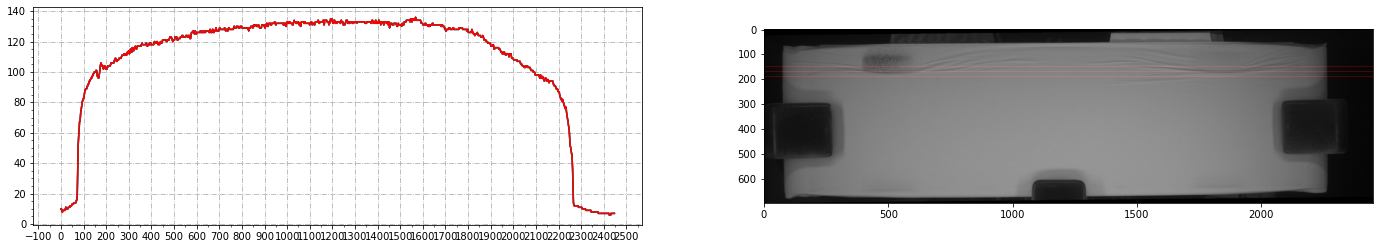

In [10]:
#查看感兴趣区域的像素值(滤波后检查)-->影响不大
choicey_list=list(range(150,200,20))

img_tmp=image.copy()

# 滤波
blur = cv2.blur(img_tmp, ksize = (3, 3))
medianblur=cv2.medianBlur(img_tmp,5)

for choicey in choicey_list:
    show_horizontal_pxile(blur,choicey)

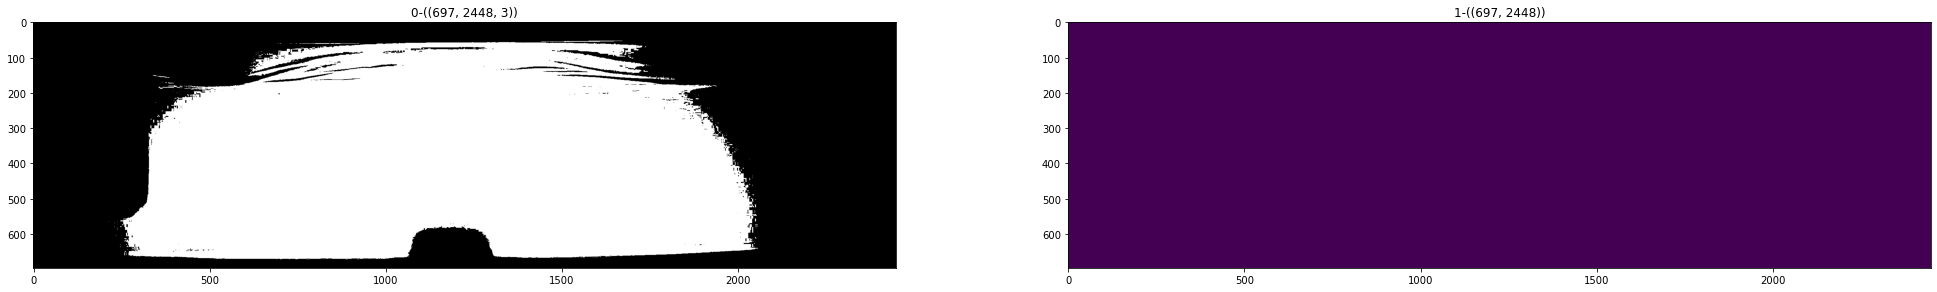

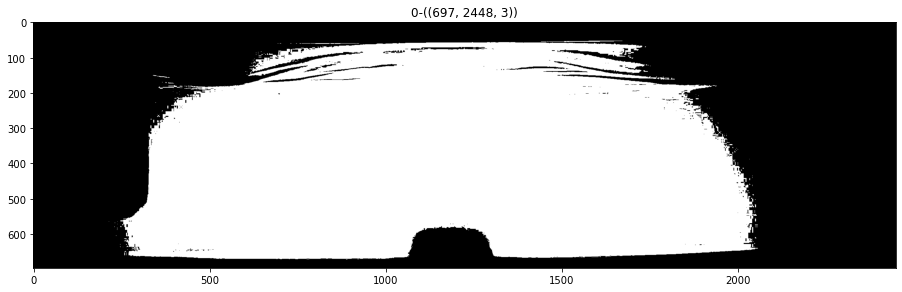

In [25]:
#简单阈值划分
thres=120
part_image=image[100:200,300:600]
_, binary =cv2.threshold(image, thres, 255, cv2.THRESH_BINARY)
binary2 =cv2.inRange(image,120,140)

show_images([binary,binary2])

# 保存mask
mask=np.zeros(binary.shape,dtype=image.dtype)
mask=np.where(binary==255,255,mask)
show_images([mask])

# cv2.imwrite(ops.basename(file_path).replace('.jpg','.png'),mask)

In [26]:
#去除光照不均匀影响
def unevenLightCompensate(img, blockSize):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    average = np.mean(gray)

    rows_new = int(np.ceil(gray.shape[0] / blockSize))
    cols_new = int(np.ceil(gray.shape[1] / blockSize))

    blockImage = np.zeros((rows_new, cols_new), dtype=np.float32)
    for r in range(rows_new):
        for c in range(cols_new):
            rowmin = r * blockSize
            rowmax = (r + 1) * blockSize
            if (rowmax > gray.shape[0]):
                rowmax = gray.shape[0]
            colmin = c * blockSize
            colmax = (c + 1) * blockSize
            if (colmax > gray.shape[1]):
                colmax = gray.shape[1]

            imageROI = gray[rowmin:rowmax, colmin:colmax]
            temaver = np.mean(imageROI)
            blockImage[r, c] = temaver

    blockImage = blockImage - average
    blockImage2 = cv2.resize(blockImage, (gray.shape[1], gray.shape[0]), interpolation=cv2.INTER_CUBIC)
    gray2 = gray.astype(np.float32)
    dst = gray2 - blockImage2
    dst = dst.astype(np.uint8)
    dst = cv2.GaussianBlur(dst, (3, 3), 0)
    dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

    return dst

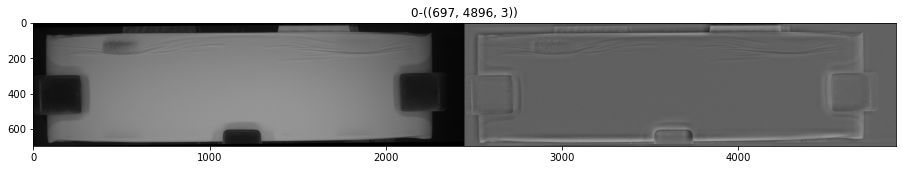

In [36]:
blockSize=32
dst = unevenLightCompensate(image, blockSize)
result = np.concatenate([image, dst], axis=1)
show_images([result])

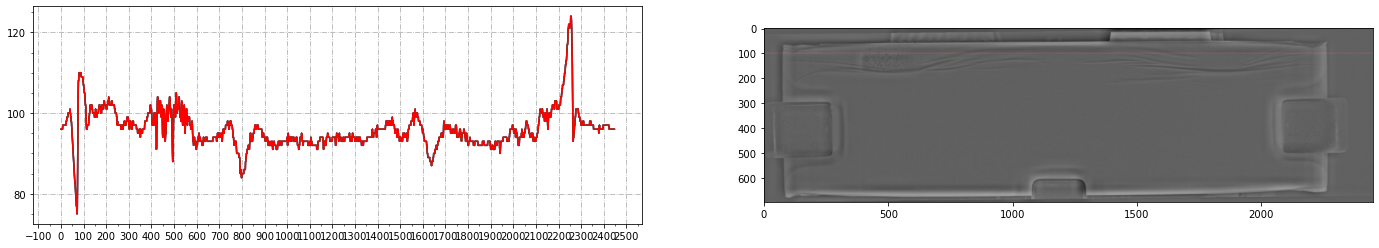

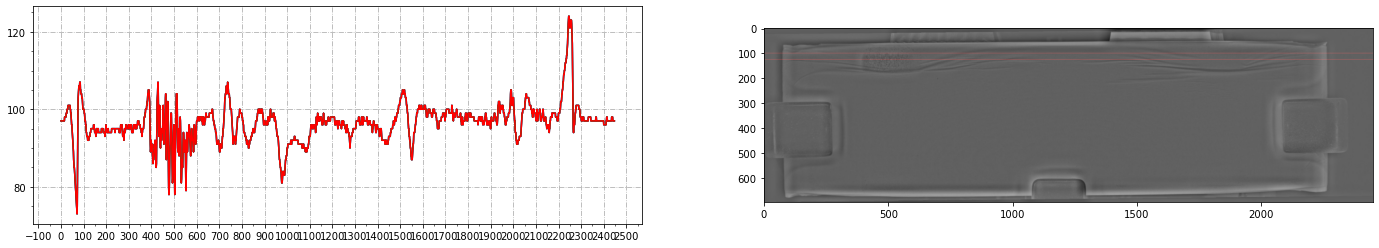

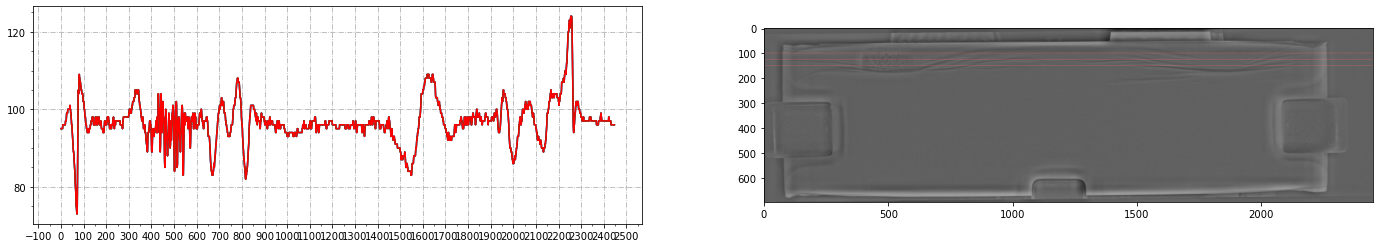

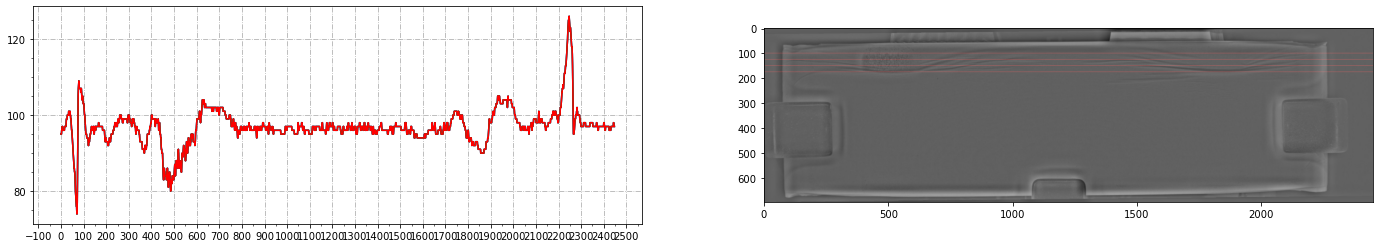

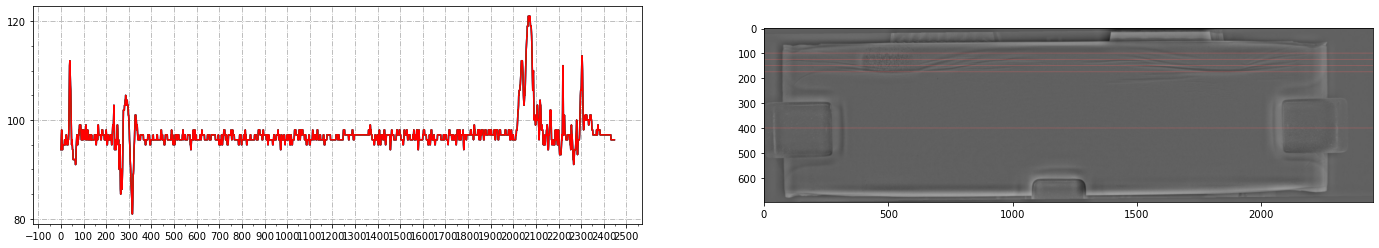

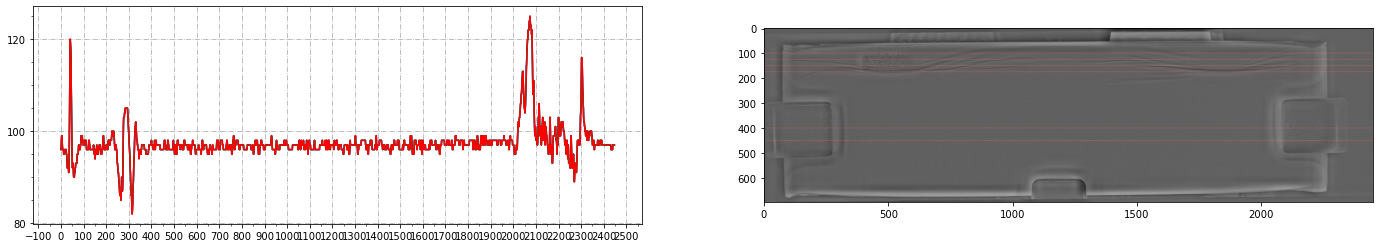

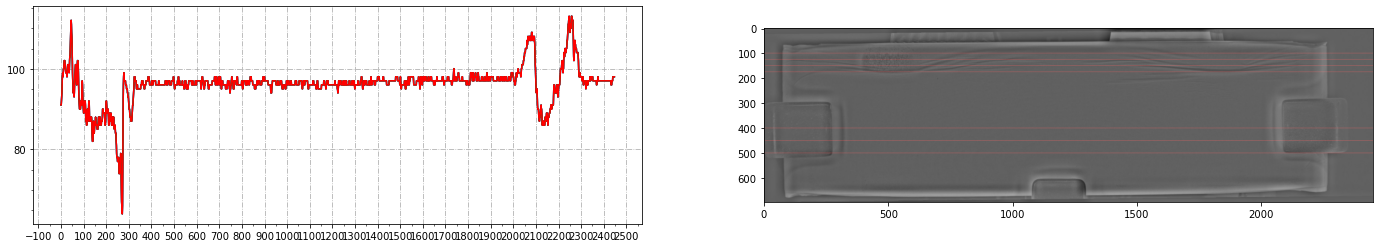

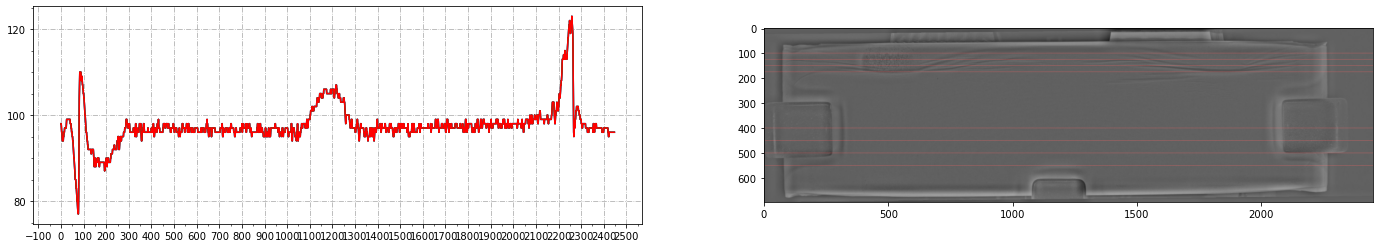

In [37]:
#查看感兴趣区域的像素值(去光照影响后)
choicey_list=list(range(100,200,25))
choicey_list.extend(list(range(400,600,50)))
img_tmp=dst.copy()

for choicey in choicey_list:
    show_horizontal_pxile(img_tmp,choicey)

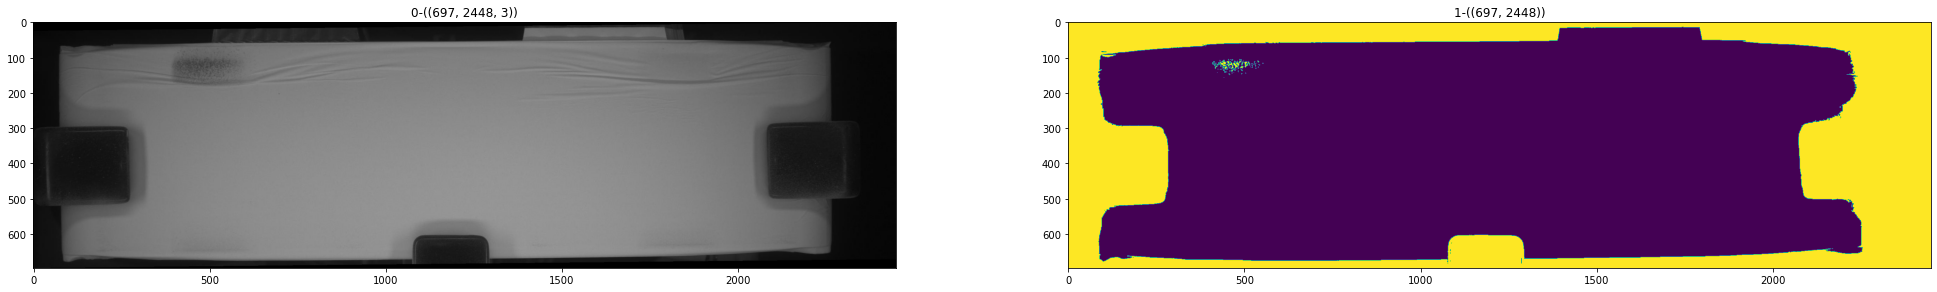

In [44]:
#大津阈值法Otsu's（根据双峰自动计算阈值，非双峰不准确）
thres=140
image=image.astype(np.uint8)
_, binary3 =cv2.threshold(image[...,0],
                         thres, 
                         255, 
                         cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
show_images([image[...,::-1],binary3])

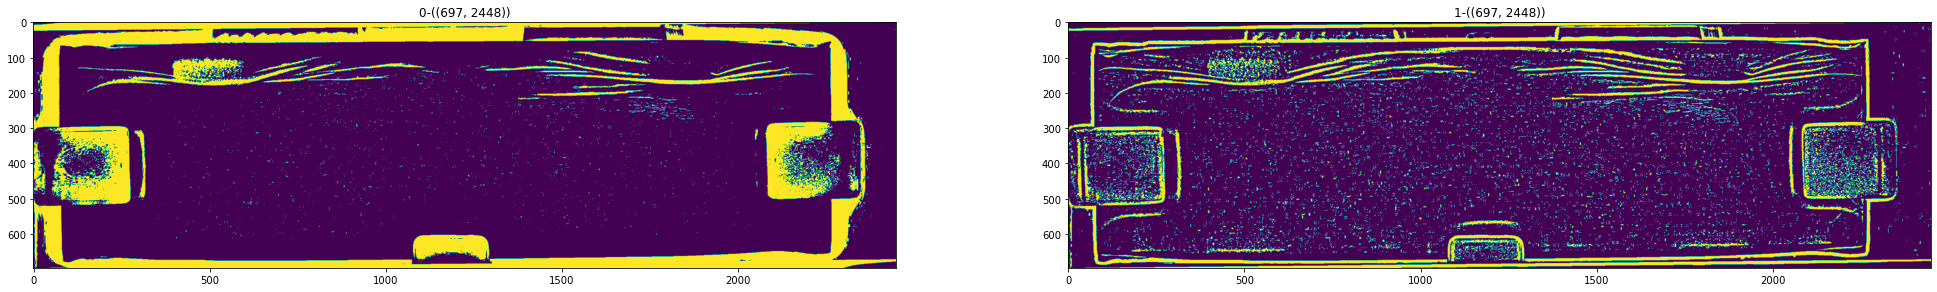

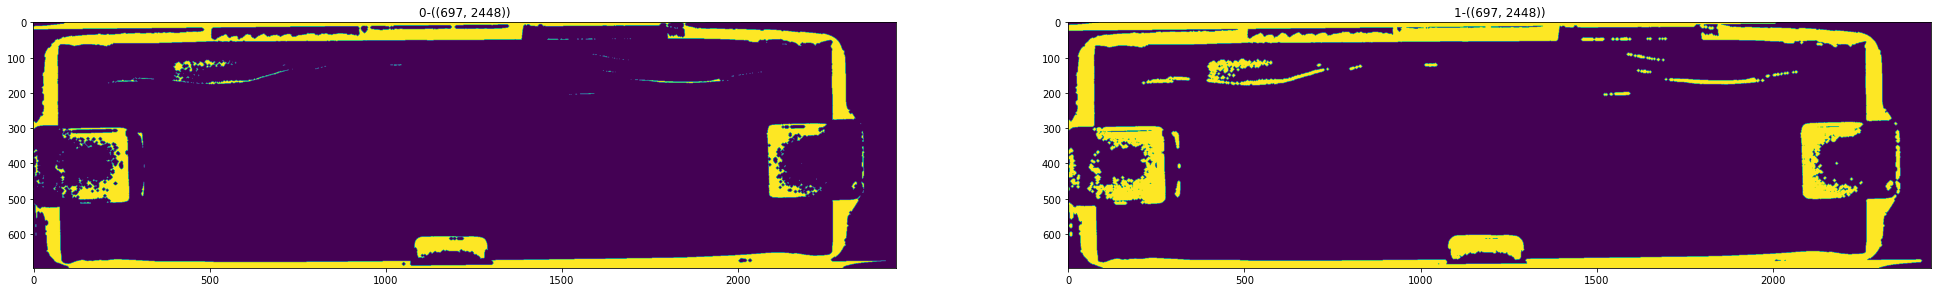

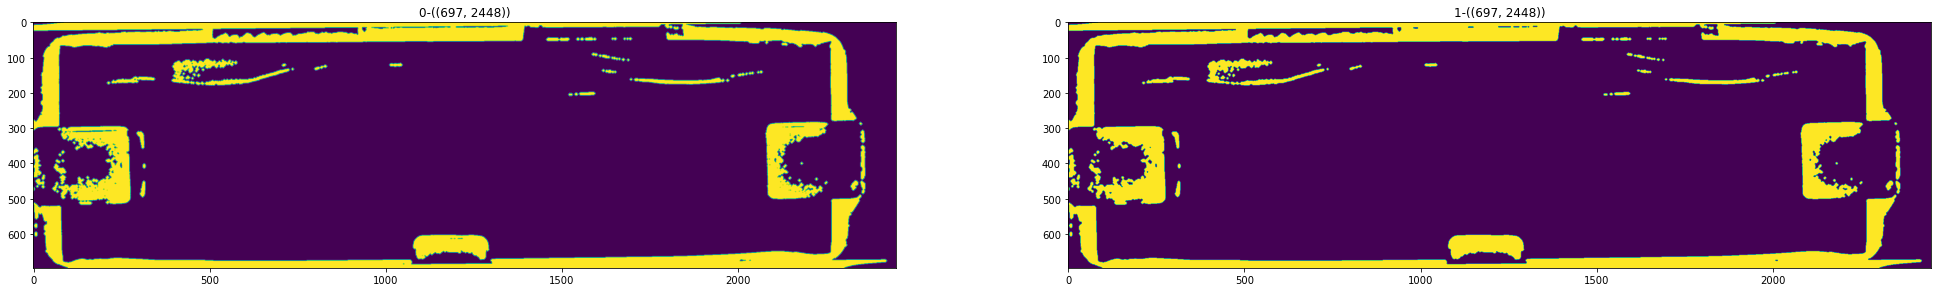

In [49]:
#自适应阈值
# BLOCKSIZE:151 物体越大，取值越大
# C:2 #取值越大，越多前进被过滤
binary1 =cv2.adaptiveThreshold(
    image[...,1],
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,191,3)
binary2 =cv2.adaptiveThreshold(
    image[...,1],
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,21,2)

# 开操作
# cv2.MORPH_RECT 
# cv2.MORPH_CROSS 
# cv2.MORPH
erosion1 = cv2.erode(binary1, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations = 4)
dilation1 = cv2.dilate(erosion1, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations = 4)

# 滤波
blur = cv2.blur(dilation1, ksize = (3, 3))
medianblur=cv2.medianBlur(dilation1,5)

show_images([binary1,binary2])
show_images([erosion1,dilation1])
show_images([blur,medianblur])
# show_horizontal_pxile(dilation1,350)

In [ ]:
#基于hsv
#读取图片
file_path=files_path[0]
hsv=cv2.imread(file_path,cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(hsv)
print(np.max(h),np.max(s),np.max(v))

# 实践

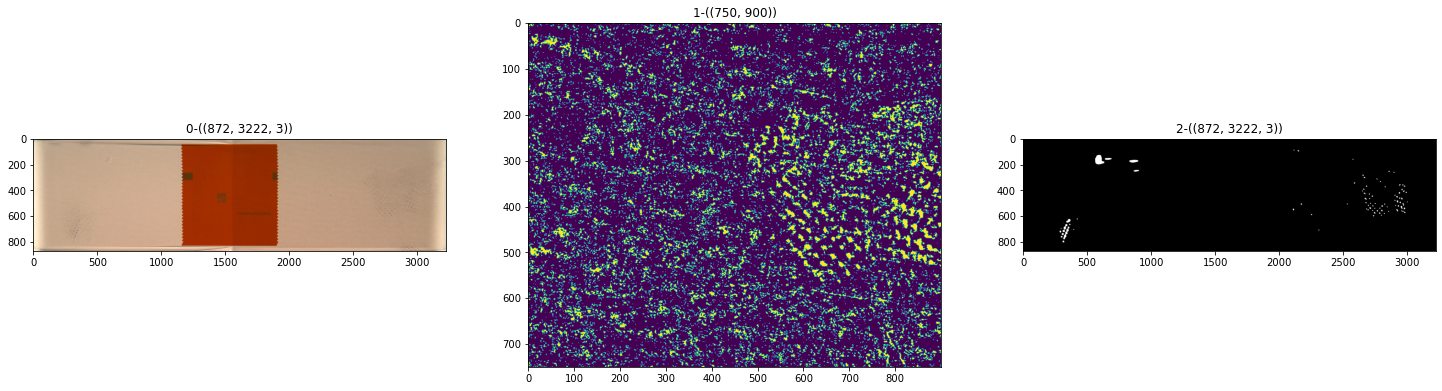

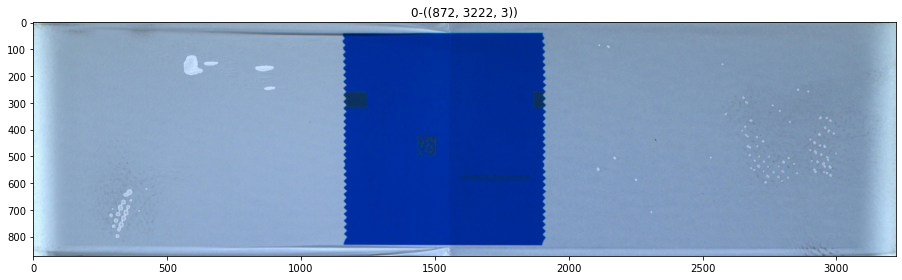

True

In [13]:
#读取图片
# file_path=files_path[1]
file_path=ops.join('images/pit/2020.10.08_01.42.57.319-200903060717674.jpg')
image=cv2.imread(file_path)
mask=cv2.imread(file_path.replace('images','masks').replace('.jpg','.png'))

region_img=image[50:800,2100:3000,1]
# blur = cv2.blur(region_img, ksize = (3, 3))
# medianblur=cv2.medianBlur(region_img,5)

#自适应阈值

binary =cv2.adaptiveThreshold(
    region_img,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,201,3)
# 腐蚀膨胀
# erosion = cv2.erode(binary, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations = 4)
# dilation = cv2.dilate(erosion, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations = 4)
#iterations连续两次开操作，消除图像的噪点
mg_mask = cv2.morphologyEx(binary,
                      cv2.MORPH_OPEN,
                      cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),
                      iterations=4)  
# 自定义去噪声
# kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel, iterations = 2)

#预览mask
# mask=np.zeros(image.shape,dtype=image.dtype)
mask[50:800,2100:3000,0]=np.where(mg_mask==255,255,mask[50:800,2100:3000,0])
mask[50:800,2100:3000,1]=np.where(mg_mask==255,255,mask[50:800,2100:3000,1])
mask[50:800,2100:3000,2]=np.where(mg_mask==255,255,mask[50:800,2100:3000,2])

mask_img=cv2.addWeighted(image,1,mask,0.2,0)

show_images([image,binary,mask],closize=4)
show_images([mask_img[...,::-1]])
cv2.imwrite('test.png',mask_img)
cv2.imwrite('image.jpg',image)
cv2.imwrite(ops.basename(file_path).replace('.jpg','.png'),mask)

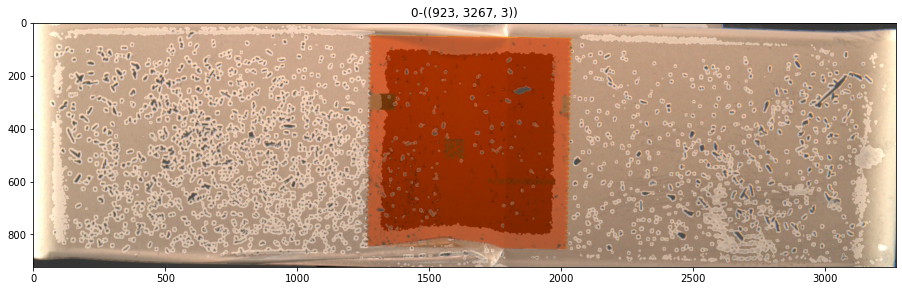

True

In [16]:
file_path=ops.join('images/point/2020.10.03_09.36.38.715-200902231353674.jpg')
image=cv2.imread(file_path)
mask=cv2.imread(file_path.replace('images','masks').replace('.jpg','.png'))

# region_img=image[100:800,:1000,1]
region_img=image[...,1]

binary =cv2.adaptiveThreshold(
    region_img,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,201,3)
# 腐蚀膨胀
# erosion = cv2.erode(binary, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations = 4)
# dilation = cv2.dilate(erosion, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)), iterations = 4)
#iterations连续两次开操作，消除图像的噪点
mg_mask = cv2.morphologyEx(binary,
                      cv2.MORPH_OPEN,
                      cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),
                      iterations=4)

# mask[100:800,:1000,0]=np.where(mg_mask==255,255,mask[100:800,:1000,0])
# mask[100:800,:1000,1]=np.where(mg_mask==255,255,mask[100:800,:1000,1])
# mask[100:800,:1000,2]=np.where(mg_mask==255,255,mask[100:800,:1000,2])

mask[...,0]=np.where(mg_mask==255,255,mask[...,0])
mask[...,1]=np.where(mg_mask==255,255,mask[...,1])
mask[...,2]=np.where(mg_mask==255,255,mask[...,2])


mask_img=cv2.addWeighted(image,1,mask,0.2,0)
show_images([mask_img])

cv2.imwrite(ops.basename(file_path).replace('.jpg','.png'),mask)

In [ ]:
ops.basename(file_path).replace('.jpg','.png')